# Assignment 3
The objective of this assignment is to get you familiarize with `AutoEncoders`.

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Note
- Code snippets are in ``Pytorch``. If you are comfortable with ``Keras`` feel free to use it. No restrictions on the frameworks

## Datasets 
- CIFAR10

## Packages Used
- Pytorch 
- Refer this link to get familiarity with pytorch and CIFAR10 dataset[link](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment3_Q2.ipynb`.

## Question 2 : Autoencoders


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

### Load CIFAR 10 Dataset

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Train Data shape:", trainset.data.shape)
print("Test Data shape:", testset.data.shape)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Train Data shape: (50000, 32, 32, 3)
Test Data shape: (10000, 32, 32, 3)


### Visualize the Data

torch.Size([16, 3, 32, 32])
torch.Size([16])


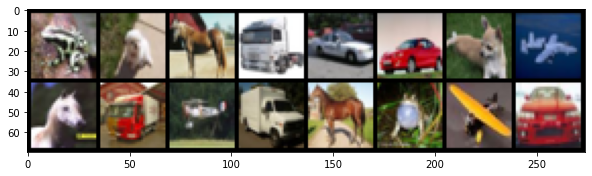

In [3]:
def imshow(img):
    img = img #/ 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))

### Define Model
Refer ``` torch.nn ``` [link](https://pytorch.org/docs/stable/nn.html) 

Experiment with different architectures of encoder and decoder i.e
- encoder and decoder is fully connected layers
- encoder and decoder is combination of convolution layers + fully connected layers
- encoder and decoder is fully convolutional layers.

**Model 1**

encoder and decoder is combination of convolution layers + fully connected layers



In [9]:
from torch.nn.modules.linear import Linear
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
    # fully convolutional layers and connected layer
            nn.Conv2d(3, 14, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(14 ,24, 4, stride=2, padding=1),# [batch, 24, 8, 8]
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(24*8*8,1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            # Write your code here
          # fully convolutional layers and connected layer
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 24*8*8),
            nn.Unflatten(1, (24,8,8)),
            nn.ReLU(),
            nn.ConvTranspose2d(24,14, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(14, 3, 4, stride=2, padding=1),
            nn.Sigmoid(),
          )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [10]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = Autoencoder().cuda()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

### Loss and Optimizer

In [11]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 14, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(14, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Flatten(start_dim=1, end_dim=-1)
  (5): Linear(in_features=1536, out_features=1024, bias=True)
  (6): ReLU()
  (7): Linear(in_features=1024, out_features=512, bias=True)
  (8): ReLU()
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=512, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=1536, bias=True)
  (3): Unflatten(dim=1, unflattened_size=(24, 8, 8))
  (4): ReLU()
  (5): ConvTranspose2d(24, 14, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (6): ReLU()
  (7): ConvTranspose2d(14, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (8): Sigmoid()
)



### Training

In [12]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs).cuda()
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "mergedlayer.pt")

[1,  2000] loss: 0.031
[2,  2000] loss: 0.019
[3,  2000] loss: 0.016
[4,  2000] loss: 0.014
[5,  2000] loss: 0.013
[6,  2000] loss: 0.012
[7,  2000] loss: 0.011
[8,  2000] loss: 0.011
[9,  2000] loss: 0.010
[10,  2000] loss: 0.010
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [13]:
autoencoder.load_state_dict(torch.load("mergedlayer.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


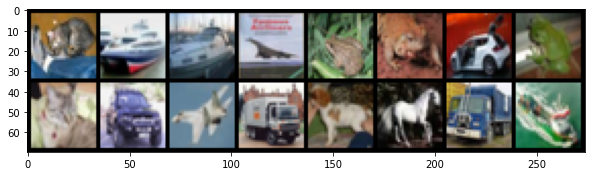

Reconstructed image


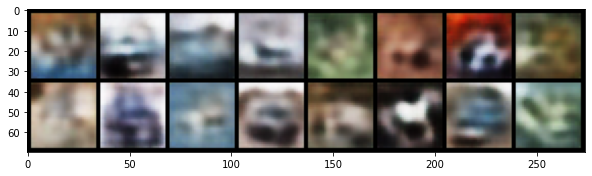

In [14]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images).cuda()

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data.cpu()))

**Model 2**

encoder and decoder is fully convolutional layers

In [52]:
from torch.nn.modules.linear import Linear
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here

            # fully convolutional layers.
            nn.Conv2d(3, 6, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(6, 12, 4, stride=2, padding=1),           # [batch, 24, 8, 8]
            nn.ReLU(),
            nn.Conv2d(12, 24, 4, stride=2, padding=1),           # [batch, 48, 4, 4]
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            # Write your code here
            #fully conv layers
            nn.ConvTranspose2d(24, 12, 4, stride=2, padding=1),  # [batch, 12, 16, 16]
            nn.ReLU(),
            nn.ConvTranspose2d(12, 6, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(6, 3, 4, stride=2, padding=1),
            nn.ReLU()
          )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [53]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = Autoencoder().cuda()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

In [54]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 6, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(6, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Conv2d(12, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (5): ReLU()
)
############## Decoder ##############
Sequential(
  (0): ConvTranspose2d(24, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): ConvTranspose2d(12, 6, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): ConvTranspose2d(6, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (5): ReLU()
)



In [55]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs).cuda()
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "convoluted.pt")

[1,  2000] loss: 0.017
[2,  2000] loss: 0.005
[3,  2000] loss: 0.004
[4,  2000] loss: 0.004
[5,  2000] loss: 0.004
[6,  2000] loss: 0.003
[7,  2000] loss: 0.003
[8,  2000] loss: 0.003
[9,  2000] loss: 0.002
[10,  2000] loss: 0.002
Finished Training
Saving Model...


In [56]:
autoencoder.load_state_dict(torch.load("convoluted.pt"))

<All keys matched successfully>

GroundTruth:    cat  ship  ship plane  frog


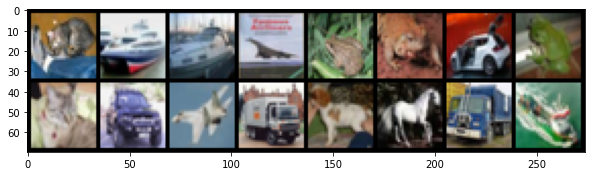

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstructed image


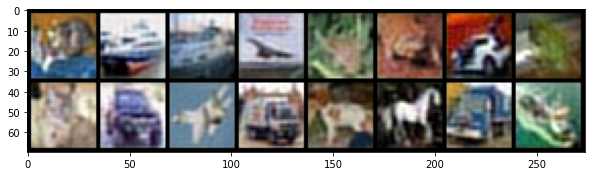

In [57]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images).cuda()

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data.cpu()))

**Model 3**

Fully Connected

In [62]:
from torch.nn.modules.linear import Linear
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            #Fully connected
            nn.Flatten(),
            nn.Linear(32*32*3, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),



        )
        self.decoder = nn.Sequential(
            # Write your code here
          #fully connected layer
          nn.Linear(512, 1024),
          nn.ReLU(),
          nn.Linear(1024, 2048),
          nn.ReLU(),
          nn.Linear(2048, 32*32*3),
          nn.Unflatten(1,(3,32,32)),
          nn.Sigmoid()

          )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [63]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = Autoencoder().cuda()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

In [64]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=2048, bias=True)
  (2): ReLU()
  (3): Linear(in_features=2048, out_features=1024, bias=True)
  (4): ReLU()
  (5): Linear(in_features=1024, out_features=512, bias=True)
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=512, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=2048, bias=True)
  (3): ReLU()
  (4): Linear(in_features=2048, out_features=3072, bias=True)
  (5): Unflatten(dim=1, unflattened_size=(3, 32, 32))
  (6): Sigmoid()
)



In [66]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs).cuda()
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "fullyconnected.pt")

[1,  2000] loss: 0.033
[2,  2000] loss: 0.024
[3,  2000] loss: 0.023
[4,  2000] loss: 0.023
[5,  2000] loss: 0.023
[6,  2000] loss: 0.023
[7,  2000] loss: 0.023
[8,  2000] loss: 0.023
[9,  2000] loss: 0.023
[10,  2000] loss: 0.023
Finished Training
Saving Model...


In [68]:
autoencoder.load_state_dict(torch.load("fullyconnected.pt"))

<All keys matched successfully>

GroundTruth:    cat  ship  ship plane  frog


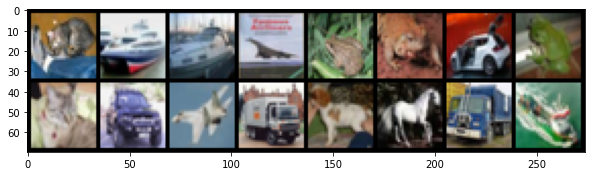

Reconstructed image


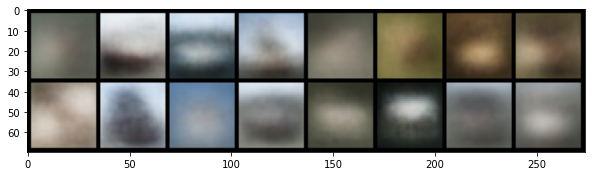

In [69]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images).cuda()

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data.cpu()))

#### 2.1 What are the Applications of Autoencoders and different types of Autoencoders

Ans 
Applications of Autoencoders:

1-Dimensionality reduction
  
2-Image Compression

3-Image Denoising

4-Feature Extraction

5-Image generation

6-Sequence to sequence prediction

7-Recommendation system


####2.2 PCA versus Autoencoders. Give detailed differences between them. (can use equations in latex and figures for the justification).

Ans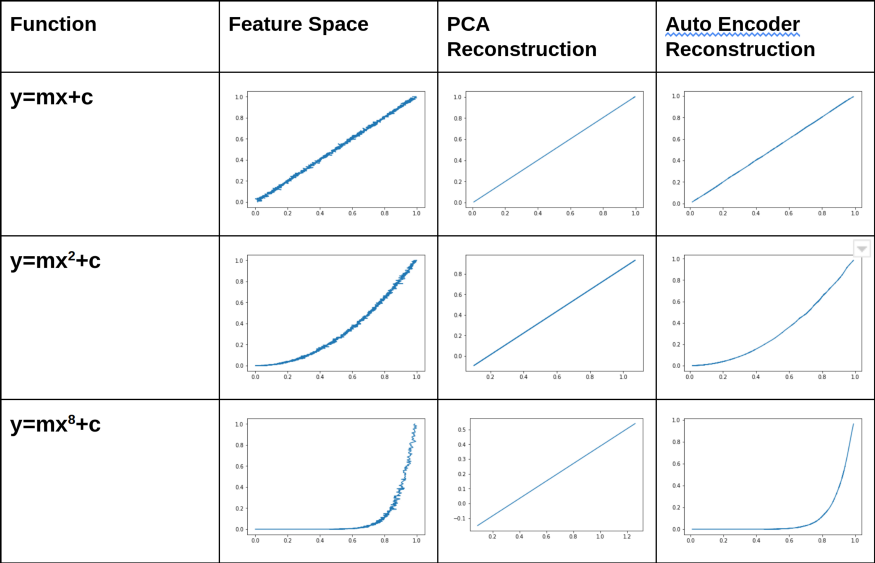


PCA is restricted to a linear map, while auto encoders can have nonlinear enoder/decoders.

Principal component analysis is faster than autoencoder, this might be because an autoencoder uses neural networks which are not computationally cheap.

PCA is quite similar to a single layered autoencoder with a linear activation function.

In between PCA and autoencoder, autoencoders are more prone to get the condition of overfitting of data than PCA, this is because with autoencoder uses backpropagation, that may learn the features to the extent that it works against the idea of the model.

PCA features are projections onto the orthogonal basis, So they are completely linearly uncorrelated. However, since autoencoded features are only trained for correct reconstruction, they may have correlations.